# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [13]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [3]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

        for item in self.items:
            self.sorted_items.append(item)

        for i in range(len(self.sorted_items)-1, 0, -1):
            for j in range(i):
                if self.sorted_items[j] > self.sorted_items[j + 1]:
                    self.sorted_items[j], self.sorted_items[j + 1] = self.sorted_items[j + 1], self.sorted_items[j]



    def get_sorted(self,):
        return self.sorted_items



# test = BubbleSort([6, 2, 3, 1, 4])
# print(test.get_sorted())


In [4]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

        for item in self.items:
            self.sorted_items.append(item)

        for i in range(1, len(self.sorted_items)):
            while i > 0 and self.sorted_items[i] < self.sorted_items[i - 1]:
                self.sorted_items[i], self.sorted_items[i - 1] = self.sorted_items[i - 1], self.sorted_items[i]
                i -= 1
        
        


    def get_sorted(self,):
        return self.sorted_items
    
# test = InsertionSort([6, 2, 3, 1, 4])
# print(test.get_sorted())

In [5]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

        for item in self.items:
            self.sorted_items.append(item)

        index = 0
        while index < len(self.sorted_items):
            # Using a variable to keep track of the minimum item of the list, default to the first element being examined
            smallest = index

            # From the index position to the end of the list, find the smallest element
            
            for i in range(index + 1, len(self.sorted_items)):
                if self.sorted_items[smallest] > self.sorted_items[i]:
                    smallest = i

            # Swapping the index element and the smallest element
            # Since the index variable is being incremented, and everything before index is assumed to be sorted, 
            # This action moves the smallest found element to the beginning of the subarray, increasing the already sorted portion
            self.sorted_items[index], self.sorted_items[smallest] = self.sorted_items[smallest], self.sorted_items[index]

            # Incrementing the index variable so that the bounds of the right subarray examined is now smaller
            index += 1

        

    def get_sorted(self,):
        return self.sorted_items
    
# test = SelectionSort([6, 2, 3, 1, 4])
# print(test.get_sorted())

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [14]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

test_list = create_custom_list(20, 100)
# Create this list for each run and update results

In [15]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

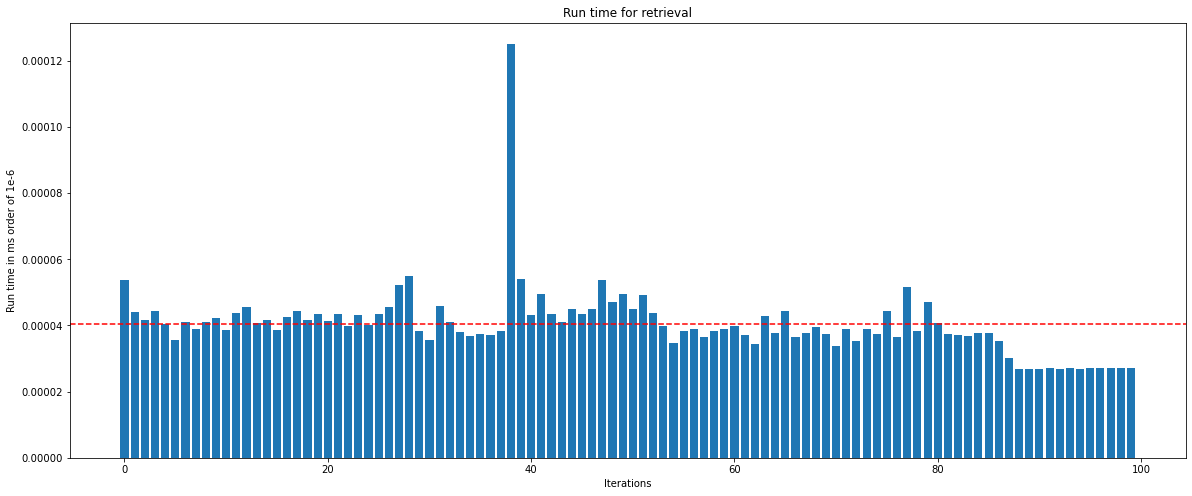

In [25]:
runs = 100
run_times = []

for i in range(runs):
    copy_list = [x for x in test_list]
    start = timeit.default_timer()
    
    test_case = BubbleSort(copy_list)

    stop = timeit.default_timer()

    run_times.append(stop-start)

draw_plot(run_times)


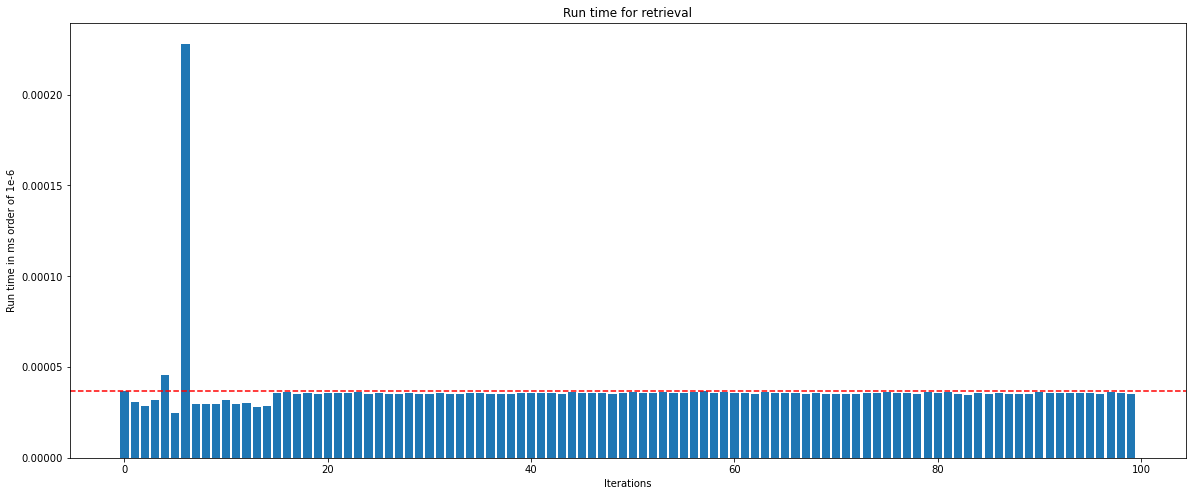

In [26]:
runs = 100
run_times = []

for i in range(runs):
    copy_list = [x for x in test_list]
    start = timeit.default_timer()
    
    test_case = InsertionSort(copy_list)

    stop = timeit.default_timer()

    run_times.append(stop-start)

draw_plot(run_times)

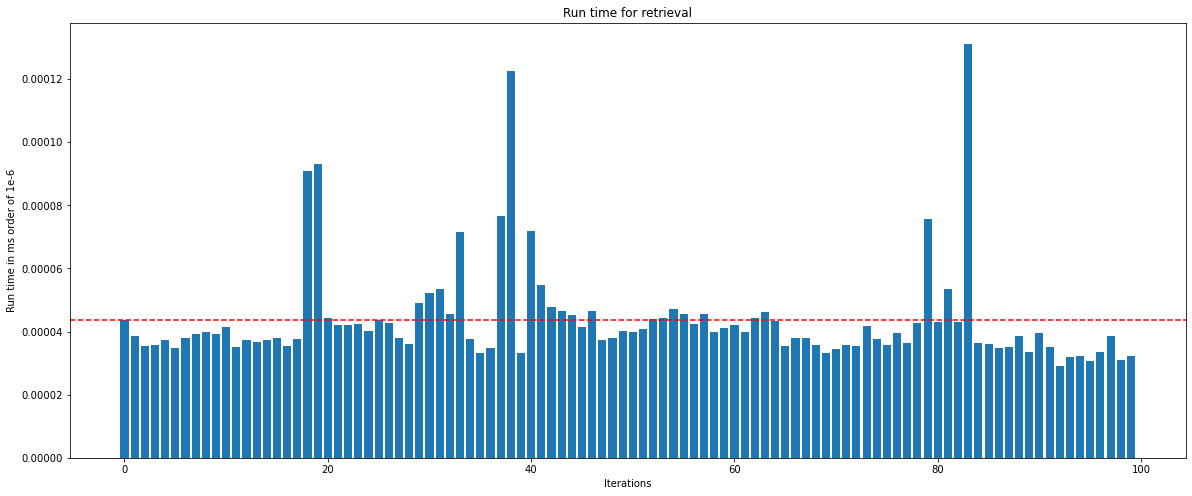

In [28]:
runs = 100
run_times = []

for i in range(runs):
    copy_list = [x for x in test_list]
    start = timeit.default_timer()
    
    test_case = SelectionSort(copy_list)

    stop = timeit.default_timer()

    run_times.append(stop-start)

draw_plot(run_times)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


a.) The given plots show that the bubble sort algorithm has an average performance of about 0.00004 ms, the insertion sort algorithm has an average performance of about 0.00004 ms, and the selection sort algorithm has an average performance of about 0.000042 ms. For the insertion and selection sort algorithm, the performance is relatively consistent except for a few iterations. For the bubble sort algorithm, the performance drops and then stays consistent around 0.000025 ms.

b.) Since we used each algorithm on the same array (test_list), we can confidently compare performance across each algorithm. Every parameter of our experiements is the same except for the sorting algorithm used. 

c. & d.) These results were pretty unexpected, considering bubble sort is one of the slower sorting algorithms. However, our results could be impacted by the randomly generated list that was used for all algorithms. If this generated list was an edge case (like sorted or nearly sorted, for example) this could impact our results. Bubble sort might be better equipped to handle these cases, resulting in its lower time performance. Insertion sort and selection sort were predicted to have faster performance times as they handle an input array more efficiently than bubble sort. Even though all of these algorithms have two iteration loops, insertion and selection sort involve dividing the array into an already sorted and unsorted portion, building onto the sorted portion with each iteration. This process is generally much more efficient than consistently checking two array elements at a time, which is the method bubble sort uses.



---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [32]:
# This is a short function to plot values on a line graph (similar to the draw_plot() function above)

def draw_line_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig = plt.figure(figsize=(20, 8))
    plt.plot(x, run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()


In [30]:
# Generating custom lists of varying lengths to test algorithm time complexity
L1 = create_custom_list(100, 1000)
L2 = create_custom_list(1000, 1000)
L3 = create_custom_list(8000, 1000)


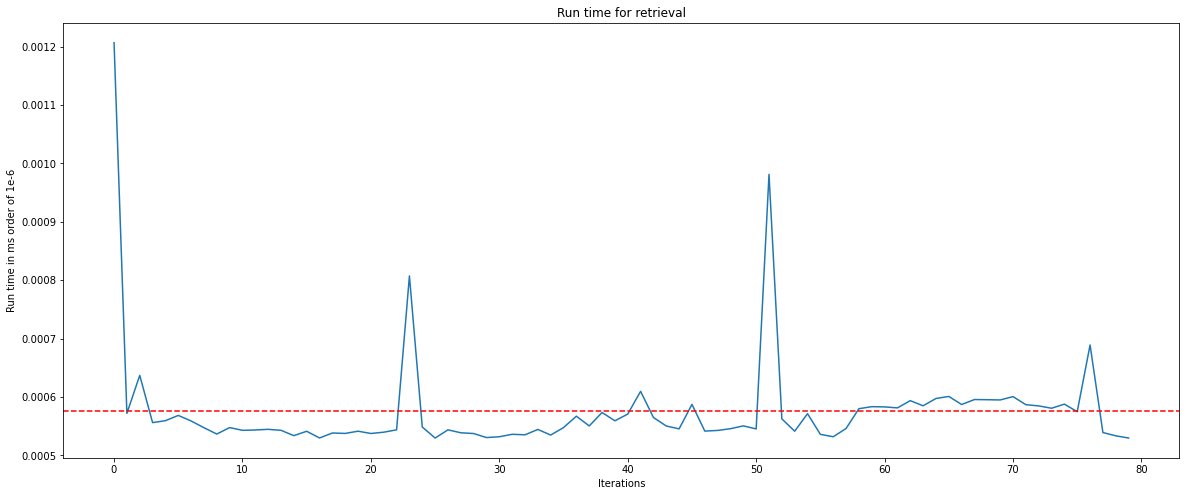

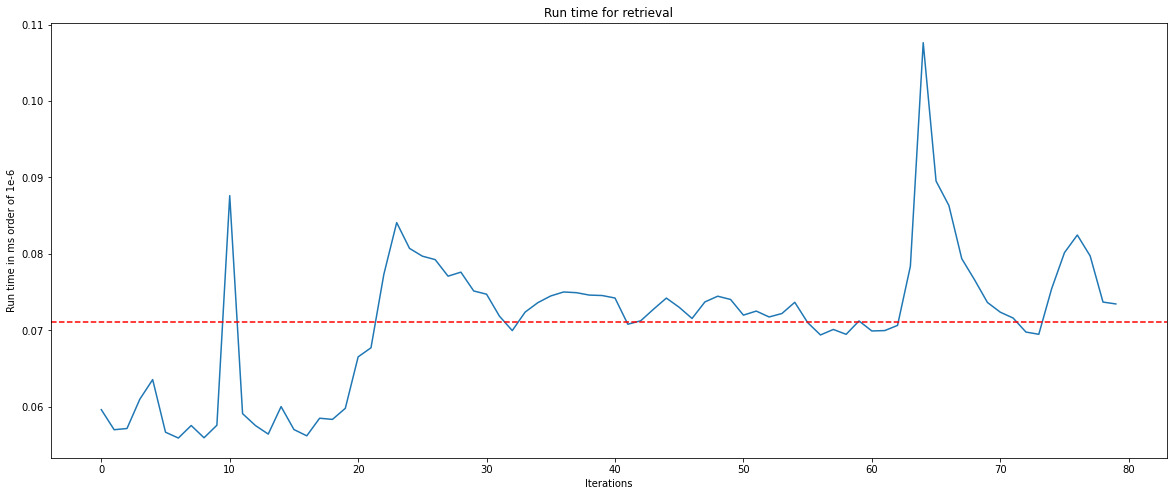

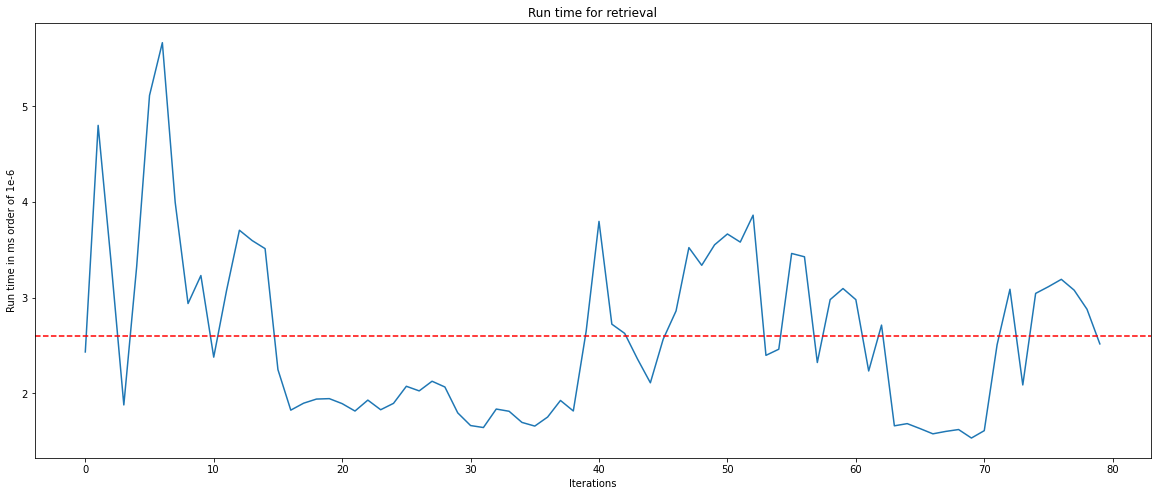

In [35]:
# Testing runs for Bubble sort. The following 3 for loops test each list L1 - L3 to show different graphs
runs = 80
L1_run_times = []

for i in range(runs):

    L1_copy = [x for x in L1]
    start = timeit.default_timer()
    
    test_case = BubbleSort(L1_copy)

    stop = timeit.default_timer()

    L1_run_times.append(stop-start)

L2_run_times = []

for i in range(runs):
    L2_copy = [x for x in L2]
    start = timeit.default_timer()
    
    test_case = BubbleSort(L2_copy)

    stop = timeit.default_timer()

    L2_run_times.append(stop-start)

L3_run_times = []

for i in range(runs):
    L3_copy = [x for x in L3]
    start = timeit.default_timer()
    
    test_case = BubbleSort(L3_copy)

    stop = timeit.default_timer()

    L3_run_times.append(stop-start)



draw_line_plot(L1_run_times)
draw_line_plot(L2_run_times)
draw_line_plot(L3_run_times)


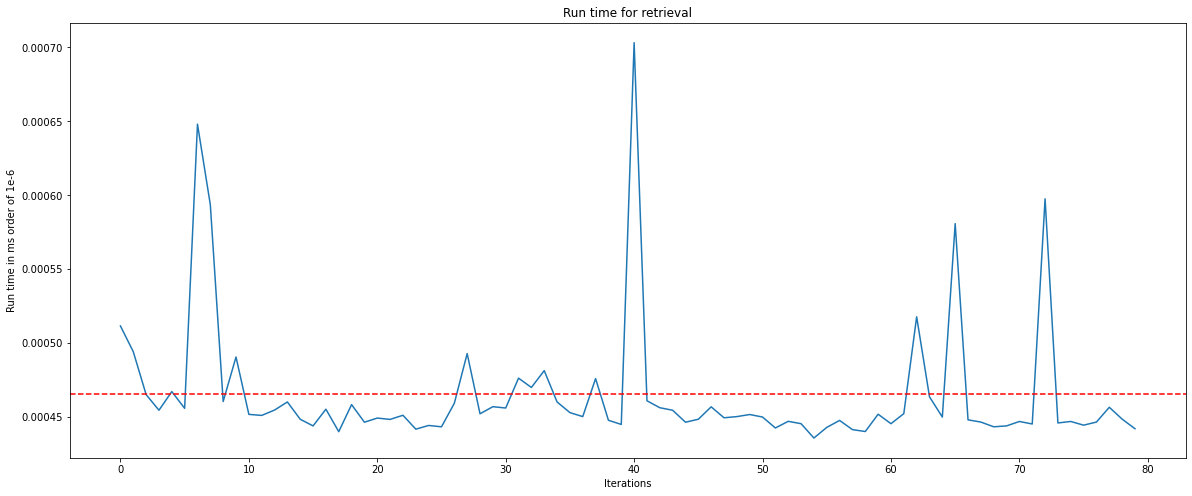

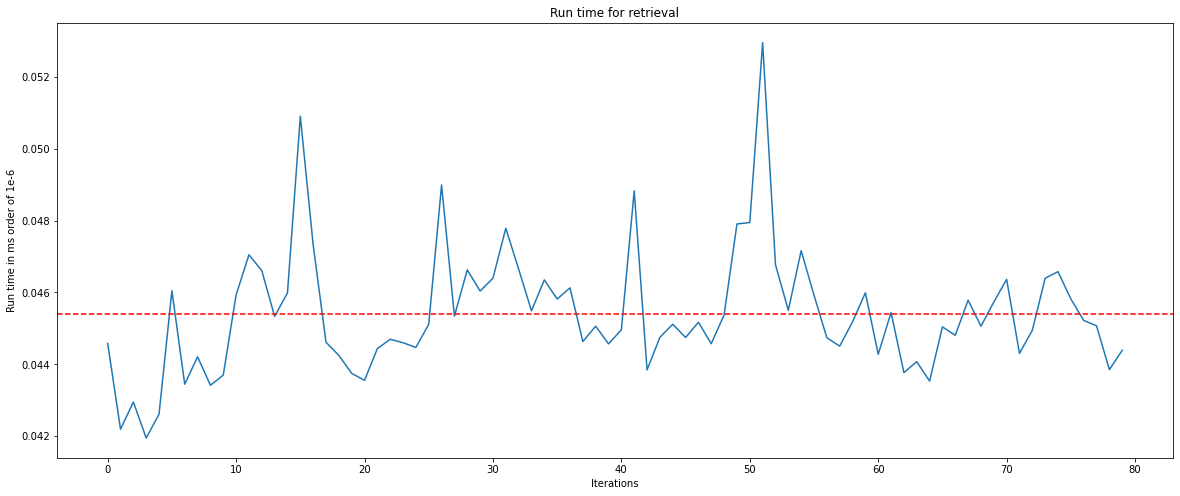

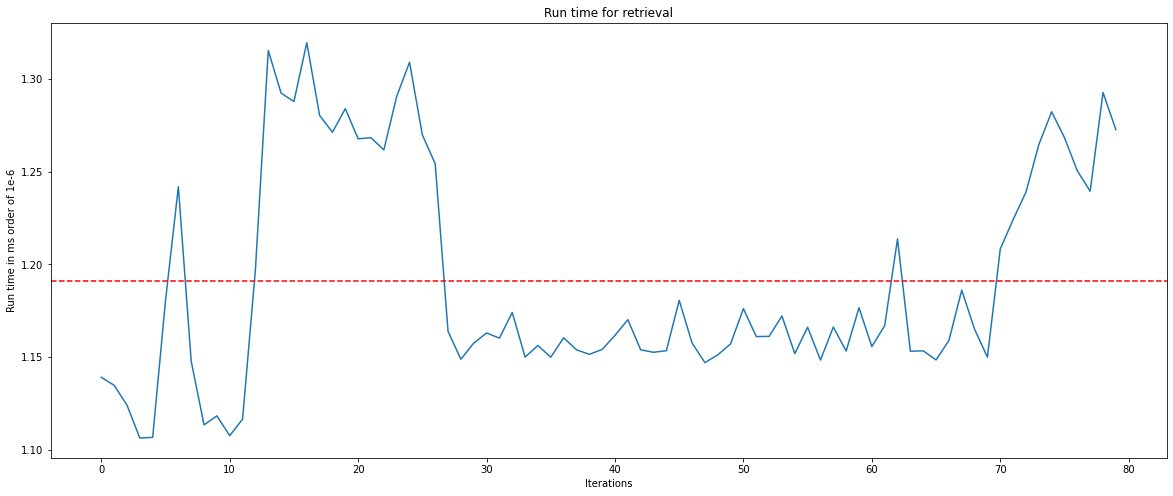

In [36]:
# Testing runs for Insertion sort. The following 3 for loops test each list L1 - L3 to show different graphs

runs = 80
L1_run_times = []

for i in range(runs):

    L1_copy = [x for x in L1]
    start = timeit.default_timer()
    
    test_case = InsertionSort(L1_copy)

    stop = timeit.default_timer()

    L1_run_times.append(stop-start)

L2_run_times = []

for i in range(runs):
    L2_copy = [x for x in L2]
    start = timeit.default_timer()
    
    test_case = InsertionSort(L2_copy)

    stop = timeit.default_timer()

    L2_run_times.append(stop-start)

L3_run_times = []

for i in range(runs):
    L3_copy = [x for x in L3]
    start = timeit.default_timer()
    
    test_case = InsertionSort(L3_copy)

    stop = timeit.default_timer()

    L3_run_times.append(stop-start)



draw_line_plot(L1_run_times)
draw_line_plot(L2_run_times)
draw_line_plot(L3_run_times)


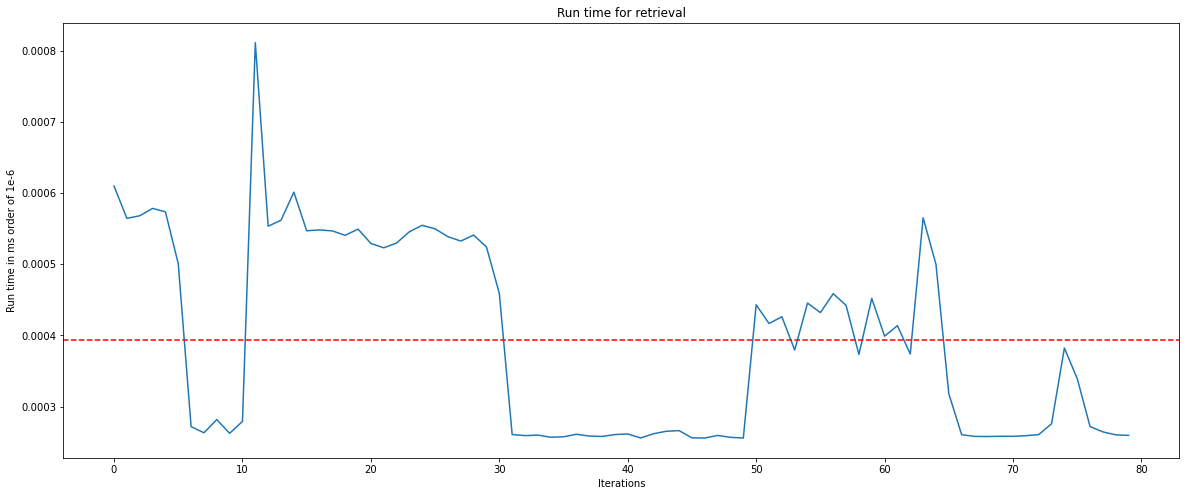

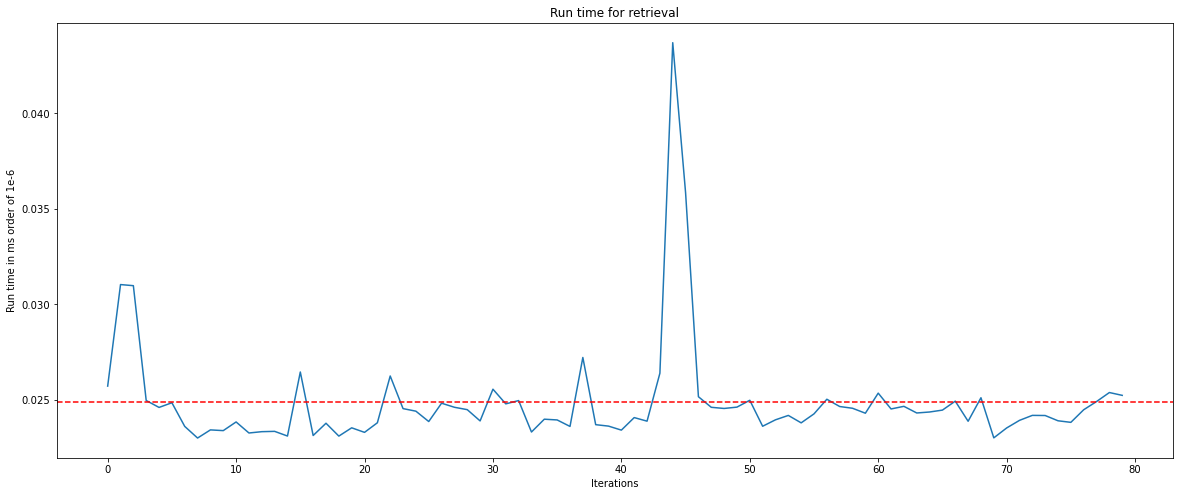

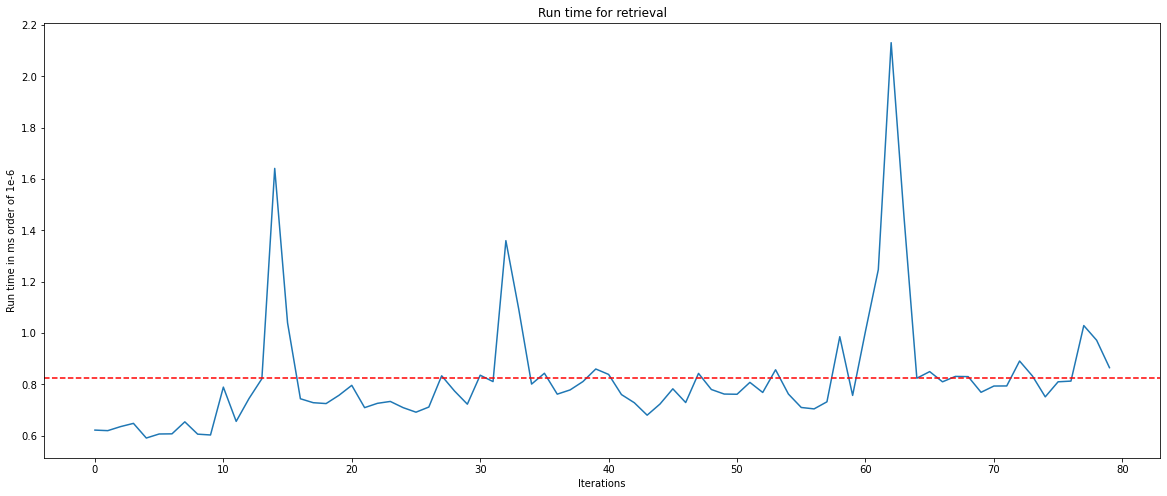

In [37]:
# Testing runs for Selection sort. The following 3 for loops test each list L1 - L3 to show different graphs

runs = 80
L1_run_times = []

for i in range(runs):

    L1_copy = [x for x in L1]
    start = timeit.default_timer()
    
    test_case = SelectionSort(L1_copy)

    stop = timeit.default_timer()

    L1_run_times.append(stop-start)

L2_run_times = []

for i in range(runs):
    L2_copy = [x for x in L2]
    start = timeit.default_timer()
    
    test_case = SelectionSort(L2_copy)

    stop = timeit.default_timer()

    L2_run_times.append(stop-start)

L3_run_times = []

for i in range(runs):
    L3_copy = [x for x in L3]
    start = timeit.default_timer()
    
    test_case = SelectionSort(L3_copy)

    stop = timeit.default_timer()

    L3_run_times.append(stop-start)



draw_line_plot(L1_run_times)
draw_line_plot(L2_run_times)
draw_line_plot(L3_run_times)


Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

For each algorithm test, the run time increased as the list length got larger. Results were generally consistent in each graph, with some high outliers. It's worth noting that some graphs (L2 and L3 in bubble sort, L3 in insertion sort, and L1 in selection sort) showed large drops in runtime for a period of iterations. 

Results of average performance(in order of L1, L2, L3):
Bubble sort: 0.000575 ms, 0.071 ms, 2.6 ms
Insertion sort: 0.000465 ms, 0.0455 ms, 1.195 ms
Selection sort: 0.00039 ms, 0.025 ms, 0.8 ms

Selection sort was the most performant and bubble sort was the least. Similar to our reasoning from the A2 reflection, it makes sense that this was the case as the selection sort algorithm handles an array with less comparisons and operations. In the second iterative loop, the selection sort algorithm uses an if statement to compare elements (instead of checking this condition on the while loop) and creates sorted and unsorted subarrays. This is much more efficient than bubble sort's brute force approach.


---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [53]:
# Modifying the given custom list generator function to be able to insert mulitple items at a time
def modified_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    sorted_list = (SelectionSort(random_list)).get_sorted()
    if item!= None:
        for i in range(len(item)):
            sorted_list.insert(item_index[i],item[i])
    return sorted_list

unsorted_list = create_custom_list(100, 1000)

# For the nearly sorted list, I'm going to sort the randomly generated array and then add 5 random elements throughout it

nearly_sorted_list = modified_custom_list(100, 1000, [76, 0, -99, 42, 30], [100, 25, 25, 0, 90])
# print(nearly_sorted_list)



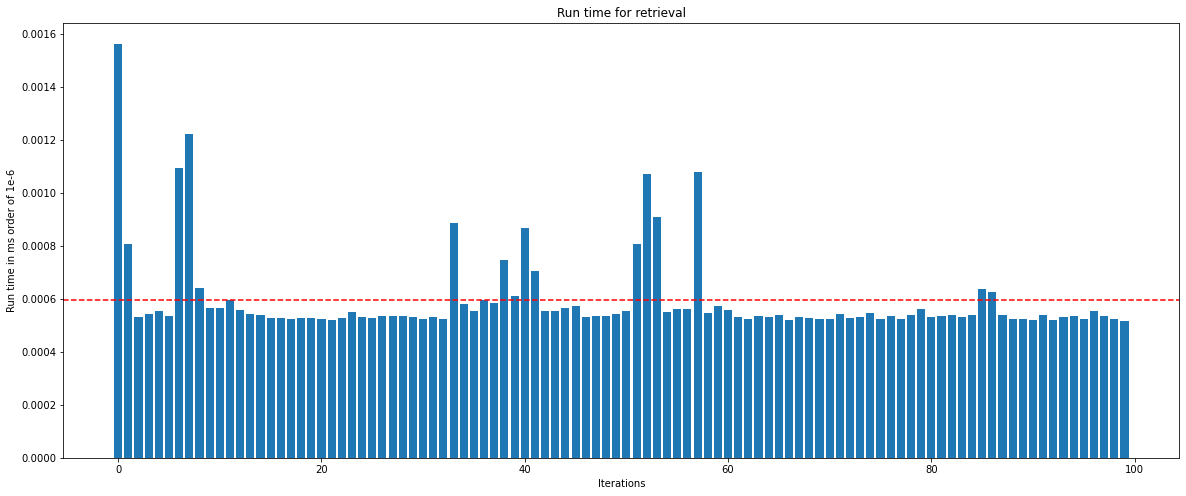

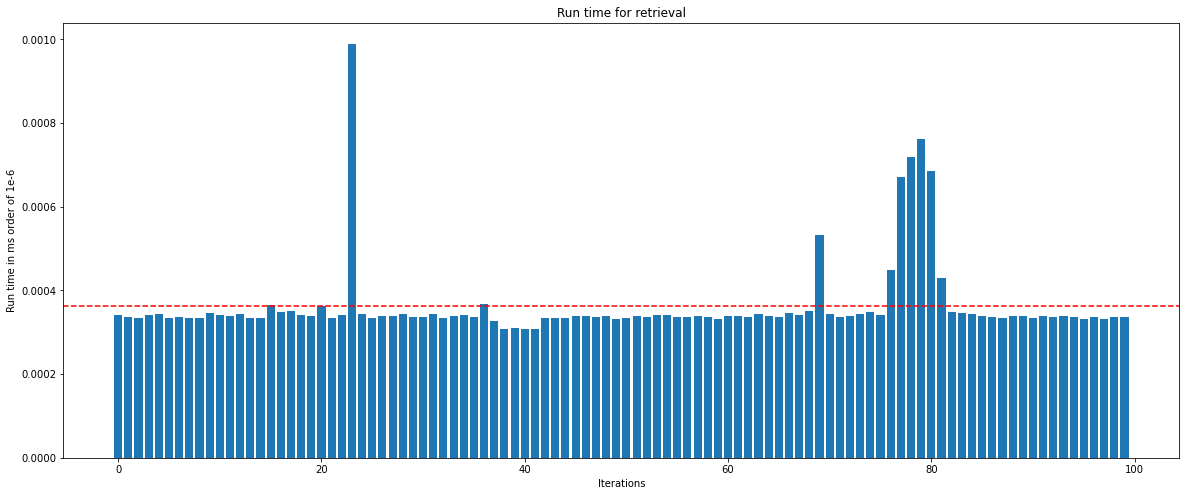

In [50]:
runs = 100
unsorted_times = []
nearly_sorted_times = []

for i in range(runs):
    unsorted_copy = [x for x in unsorted_list]
    start = timeit.default_timer()
    
    test_case = BubbleSort(unsorted_copy)

    stop = timeit.default_timer()

    unsorted_times.append(stop-start)


for i in range(runs):
    nearly_sorted_copy = [x for x in nearly_sorted_list]
    start = timeit.default_timer()
    
    test_case = BubbleSort(nearly_sorted_copy)

    stop = timeit.default_timer()

    nearly_sorted_times.append(stop-start)

draw_plot(unsorted_times)
draw_plot(nearly_sorted_times)


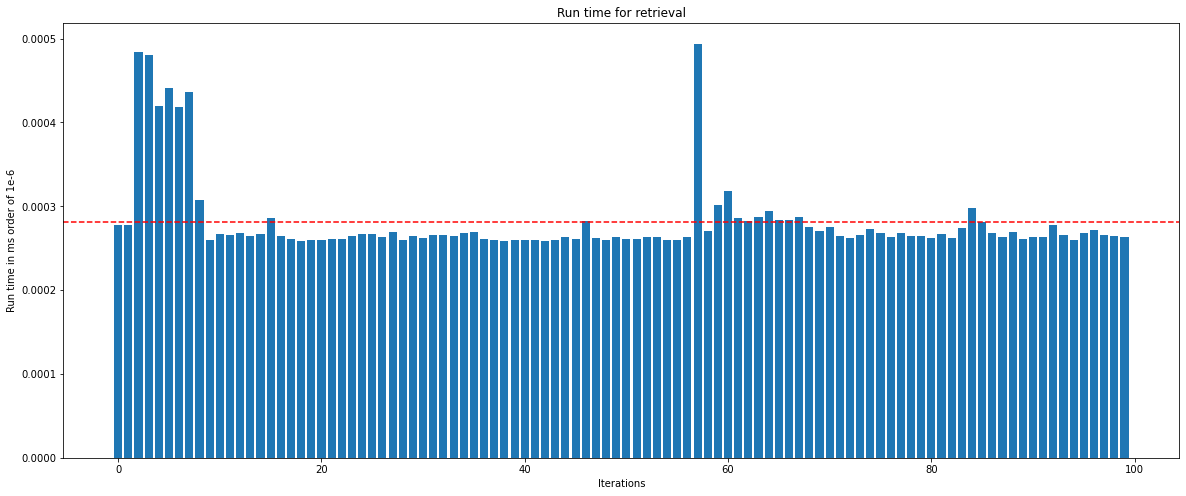

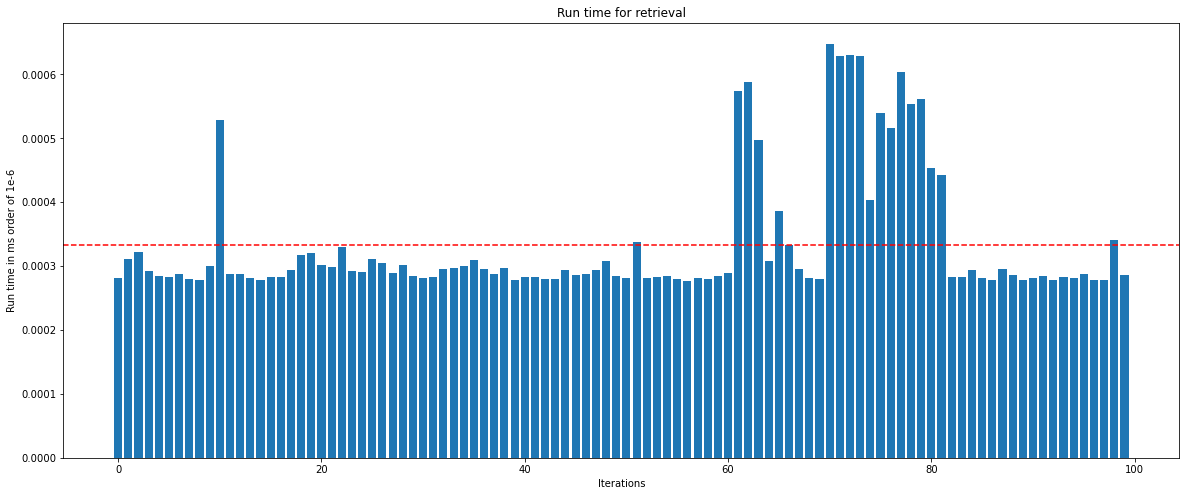

In [51]:
runs = 100
unsorted_times = []
nearly_sorted_times = []

for i in range(runs):
    unsorted_copy = [x for x in unsorted_list]
    start = timeit.default_timer()
    
    test_case = SelectionSort(unsorted_copy)

    stop = timeit.default_timer()

    unsorted_times.append(stop-start)


for i in range(runs):
    nearly_sorted_copy = [x for x in nearly_sorted_list]
    start = timeit.default_timer()
    
    test_case = SelectionSort(nearly_sorted_copy)

    stop = timeit.default_timer()

    nearly_sorted_times.append(stop-start)

draw_plot(unsorted_times)
draw_plot(nearly_sorted_times)


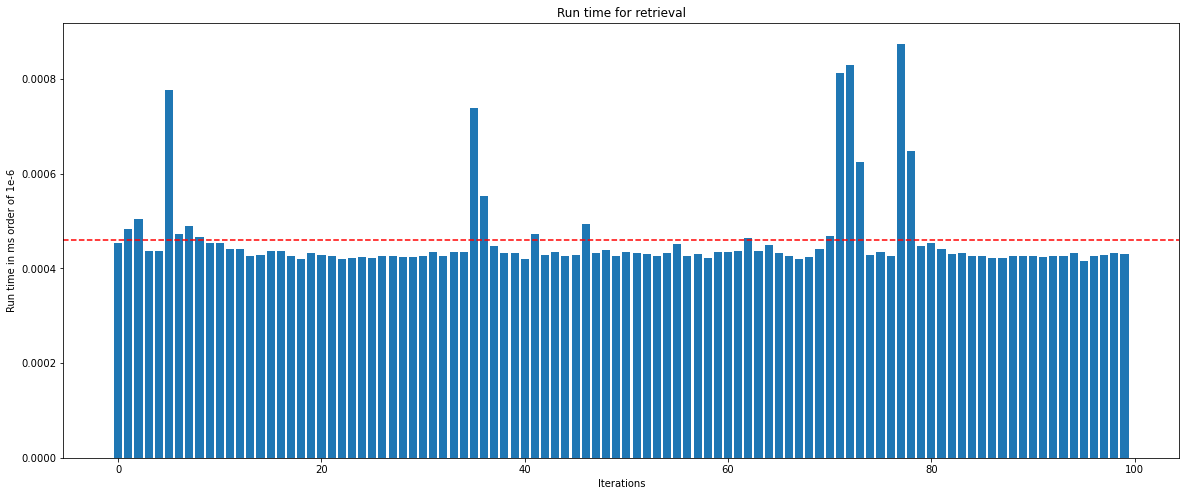

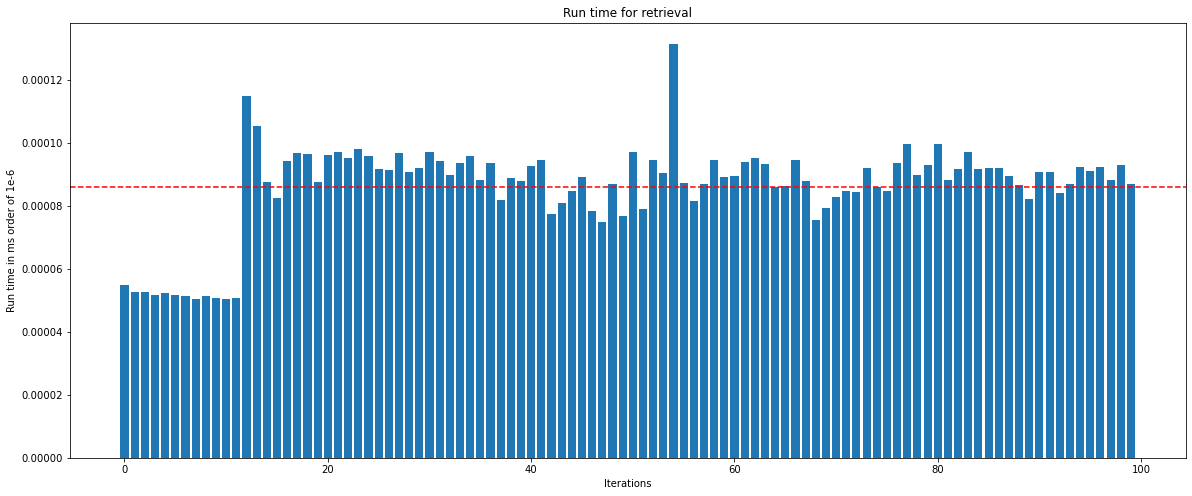

In [52]:
runs = 100
unsorted_times = []
nearly_sorted_times = []

for i in range(runs):
    unsorted_copy = [x for x in unsorted_list]
    start = timeit.default_timer()
    
    test_case = InsertionSort(unsorted_copy)

    stop = timeit.default_timer()

    unsorted_times.append(stop-start)


for i in range(runs):
    nearly_sorted_copy = [x for x in nearly_sorted_list]
    start = timeit.default_timer()
    
    test_case = InsertionSort(nearly_sorted_copy)

    stop = timeit.default_timer()

    nearly_sorted_times.append(stop-start)

draw_plot(unsorted_times)
draw_plot(nearly_sorted_times)


Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

Results of average runtime (in order of unsorted, nearly sorted list):
Bubble sort: 0.0006 ms, 0.00038 ms
Selection sort: 0.00028 ms, 0.00034 ms
Insertion sort: 0.00046 ms, 0.000088 ms

a.) For unsorted lists, selection sort is the most performant and bubble sort is the least. For nearly sorted lists, insertion sort is the most performant and insertion sort is the least. Selection sort is more efficient for unsorted lists as it uses less comparisons (similar to results in the part A3 reflection) and divides the array into a sorted and unsorted subarray. Bubble sort was least efficient for the unsorted array because the if statement that checks two elements at a time would need to be executed constantly, using a lot of operations to swap. 

Insertion sort was the most performant when sorting the nearly sorted array. This would be because since the algorithm picks the smallest element of the unsorted subarray and inserts it into the sorted subarray, the first item examined in the unsorted portion would likely be in the correct spot already (since it would now be the largest of the sorted portion). This means the while loop in the algorithm would not need to execute as many times for a nearly sorted list. Since bubble sort does not divide the given array, it needs to iterate over the entire list extensively until it recognizes the sorted array. This would cause the highest runtime for this case.

b.) The performance did not really vary significantly, besides from the low runtime of the insertion sort algorithm on the nearly sorted array.

c.) The bubble sort and insertion sort algorithm for the unsorted array gave the higher runtimes. Bubble sort's iterative approach (with no way of checking if a list is sorted using subarrays) would explain its performance. For insertion sort, depending on where the smaller values in the array are located, could explain its runtime. For example, if more lower elements are located at the end of the array, the algorithm would need to move them further throughout the sorted portion, which would cause more operations and comparisons within the algorithm's while loop. 

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [2]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [3]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [ ]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [ ]:
## you experiment code goes here

**Reflection**:

---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [4]:
def binary_search_4(item_list, to_find):
    return False

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

In [ ]:
# your implementation and experiments go here.

##### Result Discussion:

---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [18]:
# Creating the Heap Sort Algorithm
import os
import math
import random
from PrettyPrint import PrettyPrintTree
from colorama import Back,Style,Fore

# Using the Heap algebraic data type implementation we covered in class
# However, the heap sort algorithm is implemented within the Heap class for simplicity
# Further explanation is in the heap_sort() method within the Heap class

class Tree:
    def __init__(self, value):
        self.val = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)
        return child
    
    def get_children(self,):
        return len(self.children)
    
def show_heap(items):
    pt = PrettyPrintTree(lambda x: x.children, lambda x: x.val,color=Back.CYAN+Fore.BLACK)
    tree = Tree(items[0])
    
    child_nodes = [tree.add_child(Tree(items[1])),tree.add_child(Tree(items[2]))]
    i=3
    while i<len(items):
        new_child_nodes=[]
        for child_node in child_nodes:
            if i<len(items):
                new_child_nodes.append(child_node.add_child(Tree(items[i])))
            if i+1<len(items):
                new_child_nodes.append(child_node.add_child(Tree(items[i+1])))
            i+=2
        child_nodes = [node for node in new_child_nodes]
    pt(tree)

class Heap:

    def __init__(self, data):
        self.items = data
        self.length = len(data)
        self.build_heap()
    
    def find_left_index(self,index):
        return 2 * (index + 1) - 1

    def find_right_index(self,index):
        return 2 * (index + 1)

    def find_parent_index(self,index):
        return (index + 1) // 2 - 1  

    def heapify(self,index):
        largest_known_index = index
        left_index = self.find_left_index(index)
        right_index = self.find_right_index(index)

        if left_index < self.length and self.items[left_index] > self.items[index]:
            largest_known_index = left_index
        if right_index < self.length and self.items[right_index] > self.items[largest_known_index]:
            largest_known_index = right_index
        if largest_known_index != index:
            self.items[index], self.items[largest_known_index] = self.items[largest_known_index], self.items[index]
            self.heapify(largest_known_index)

    def build_heap(self,):
        # print ("Before heapify:")
        # show_heap(self.items)

        for i in range(self.length // 2 - 1, -1, -1):
            self.heapify(i)

        # print("\n")
        # print ("After heapify:")
        # show_heap(self.items)     

    def bubble_up(self,index):
        parent_index = self.find_parent_index(index)
        
        while index>0 and self.items[index] > self.items[parent_index]:
            self.items[index],self.items[parent_index] = self.items[parent_index],self.items[index]
            self.bubble_up(parent_index)
    

    def insert_value(self,value):
        if self.length == len(self.items):
            self.items.append(value)
        else:
            self.items[self.length -1]
        self.length +=1
        #print("Before Bubble Up")
        #show_heap(self.items)
        self.bubble_up(self.length-1)
        #print("After Bubble Up")
        #show_heap(self.items)

    def extract_max(self,):
        self.items[0],self.items[self.length -1] = self.items[self.length-1],self.items[0]
        max_value = self.items[self.length-1]
        self.length -=1
        self.heapify(0)
        return max_value
    
    # Normally, heap sort has two steps: remove the max node in the heap, and then heapify the given array to restore the heap properties
    # However, the Heap implementation discussed in class already includes an extract_max function that removes the max element in the heap, decreases the length of self.items, and "reheapifies" the object
    # So in order to fully implement heap sort, we can use this method and just store the item removed when extract_max is called in a new array
    # If the maximum value in the heap is returned each time when extract_max is called, we can insert every new element at the beginning of the new array made
    # This ensures that this new array we created is in ascending order. 

    def heap_sort(self,):
        self.sorted_items = []

        while self.length != 0:
            element = self.extract_max()
            self.sorted_items.insert(0, element)
    
    # We implemented a standard get method to return the new sorted array we made
    def get_sorted(self,):
        return self.sorted_items

# Basic testing to check the two new methods we made
         
# test = Heap([1, 2, 3, 4, 5])
# test.heap_sort()
# test.get_sorted()
            

In [16]:
# For testing, we're going to use the same method used in part A3 of this lab to check runtimes.
# We'll make three different lists of varying lengths and graph each to compare differences

L1 = create_custom_list(100, 1000)
L2 = create_custom_list(1000, 1000)
L3 = create_custom_list(8000, 1000)

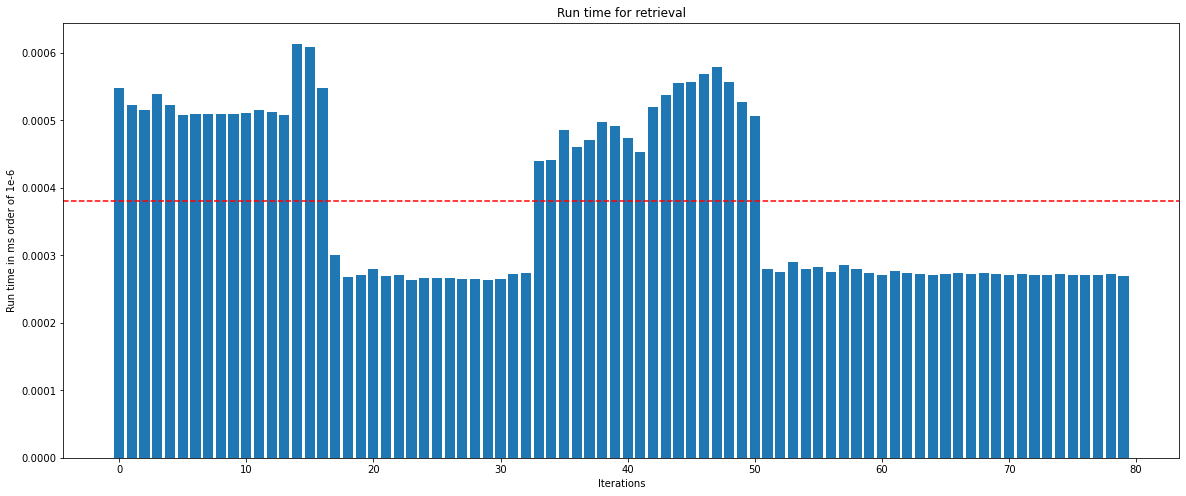

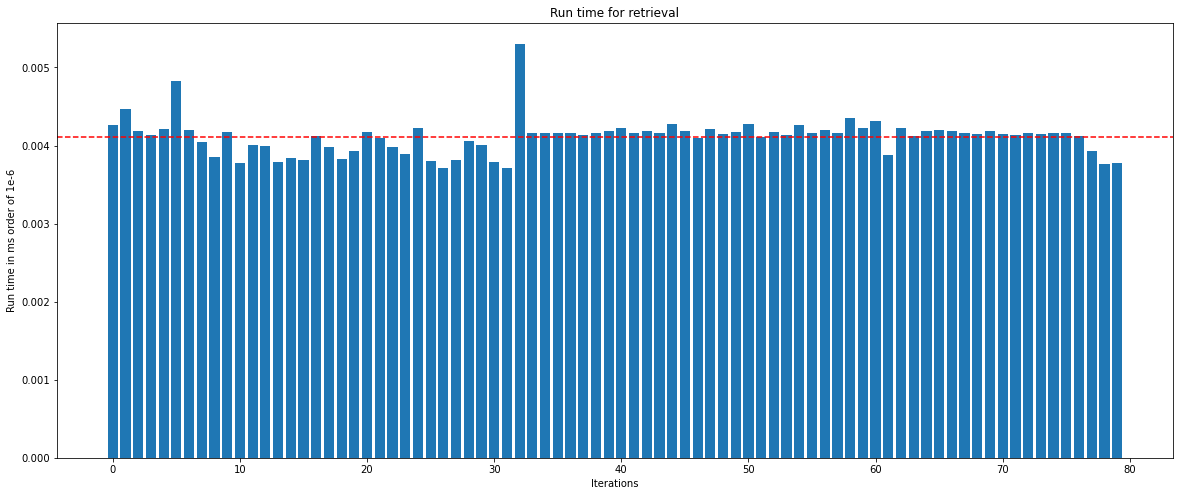

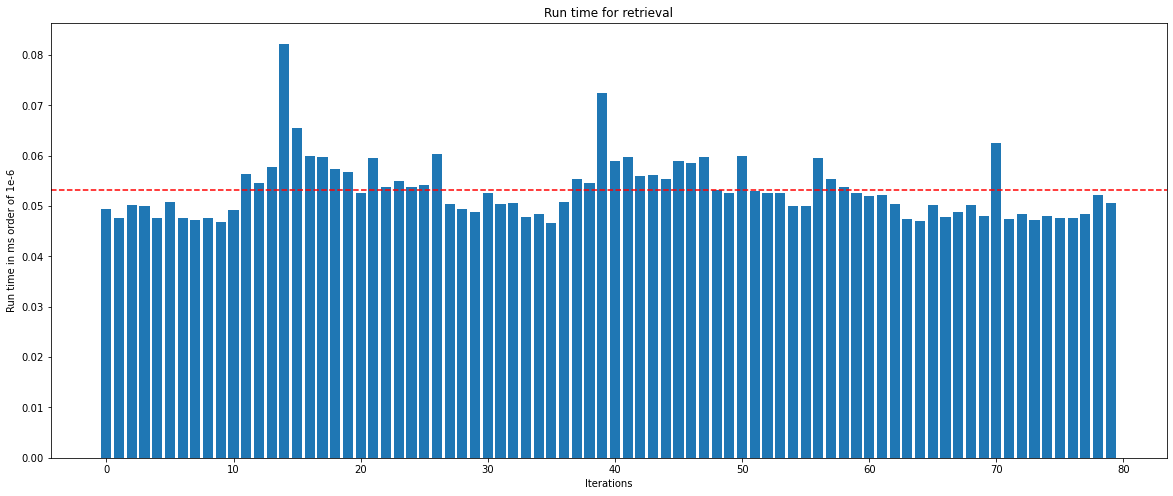

In [19]:
# Testing the Heap Sort Algorithm

runs = 80
L1_run_times = []

for i in range(runs):
    L1_copy = [x for x in L1]
    

    start = timeit.default_timer()

    test_case = Heap(L1_copy)
    test_case.heap_sort()

    stop = timeit.default_timer()

    L1_run_times.append(stop - start)

L2_run_times = []

for i in range(runs):
    L2_copy = [x for x in L2]
    

    start = timeit.default_timer()

    test_case = Heap(L2_copy)
    test_case.heap_sort()

    stop = timeit.default_timer()

    L2_run_times.append(stop - start)

L3_run_times = []

for i in range(runs):
    L3_copy = [x for x in L3]
    

    start = timeit.default_timer()

    test_case = Heap(L3_copy)
    test_case.heap_sort()

    stop = timeit.default_timer()

    L3_run_times.append(stop - start)

draw_plot(L1_run_times)
draw_plot(L2_run_times)
draw_plot(L3_run_times)



In [2]:
# # Merge Sort Implementation
# class MergeSort:
#     def __init__(self, items):
#         self.items = items
#         self.sorted_items = []
#         self.length = len(items)

#         for item in self.items:
#             self.sorted_items.append(item)

#     def sort(self, array):
#         if len(array) > 1:
#             midpoint = self.length // 2

#             left = array[0:midpoint]
#             right = array[midpoint:self.length - 1]

#             self.sort(left)
#             self.sort(right)

#             left_ptr = 0
#             right_ptr = 0
#             index = 0


#             while left_ptr < len(left) and right_ptr < len(right):
#                 if left[left_ptr] <= right[right_ptr]:
#                     array[index] = left[left_ptr]
#                     left_ptr += 1
#                 else:
#                     array[index] = right[right_ptr]
#                     right_ptr += 1
#                 index += 1

#             while left_ptr < len(left):
#                 array[index] = left[left_ptr]
#                 left_ptr += 1
#                 index += 1

#             while right_ptr < len(right):
#                 array[index] = right[right_ptr]
#                 right_ptr += 1
#                 index += 1

#     def get_sorted(self):
#         return self.sorted_items

In [1]:
# test = MergeSort([9, 1, 4, 7, 6, 0])
# test.sort(test.sorted_items)
# test.get_sorted()

In [1]:
# Merge Sort Testing


In [20]:
# Quick Sort Implementation

class QuickSort:
    def __init__(self, items):
        self.items = items
        self.sorted_items = []

        for item in self.items:
            self.sorted_items.append(item)

    def partition(self, array, min_index, max_index):
        pivot = array[max_index]

        i = min_index - 1
        
        j = min_index
        while j <= max_index:
            if array[j] < pivot:
                i += 1
                array[i], array[j] = array[j], array[i]
            j += 1
        i += 1

        array[i], array[max_index] = array[max_index], array[i]
        return i
        

    
    def sort(self, array, min_index, max_index):
        if max_index <= min_index:
            return

        pivot = self.partition(array, min_index, max_index)

        self.sort(array, min_index, pivot - 1)
        self.sort(array, pivot + 1, max_index)

    def get_sorted(self):
        return self.sorted_items
    
# test = QuickSort([9, 1, 4, 7, 6, 0])
# test.sort(test.sorted_items, 0, 5)
# test.get_sorted()

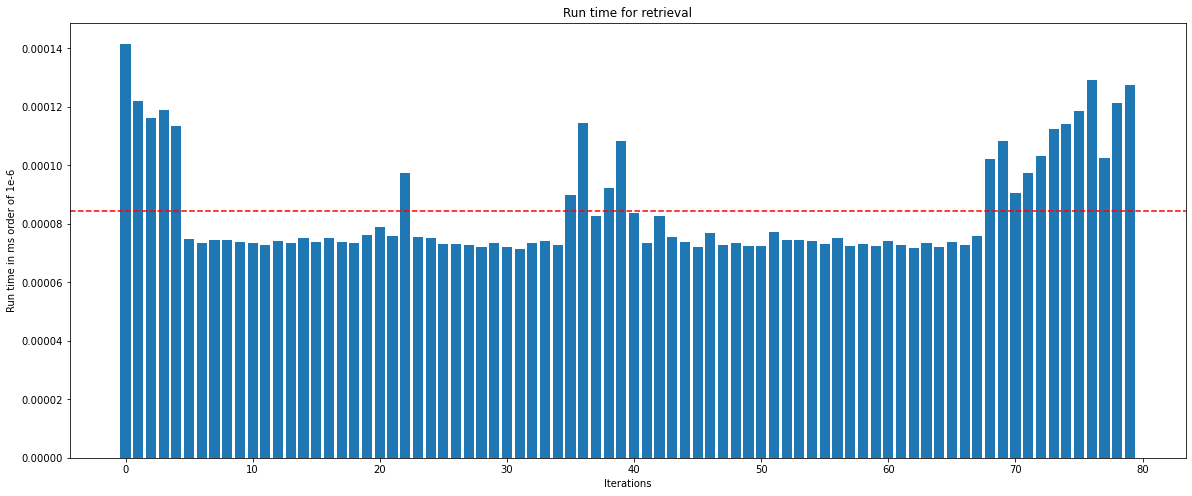

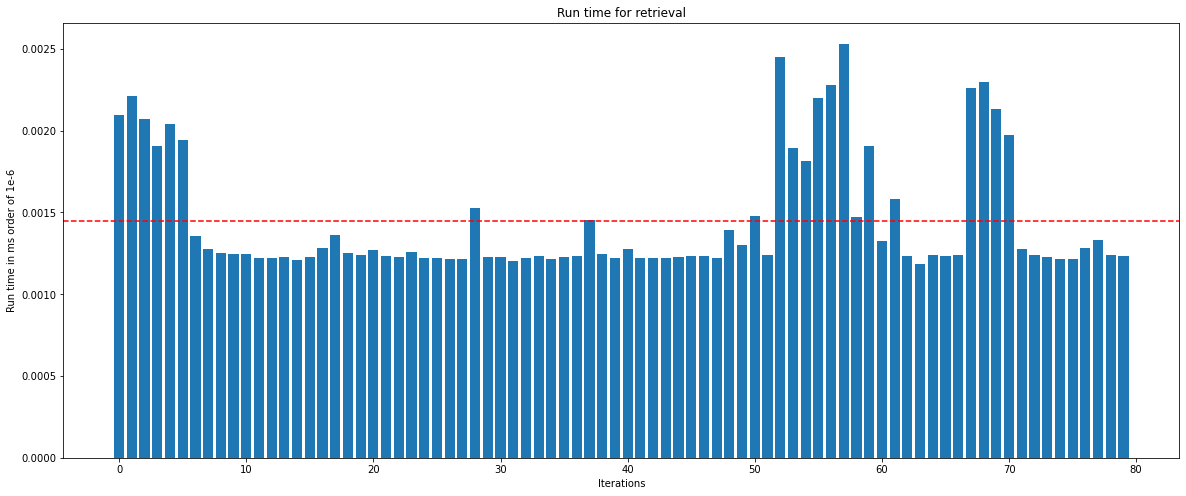

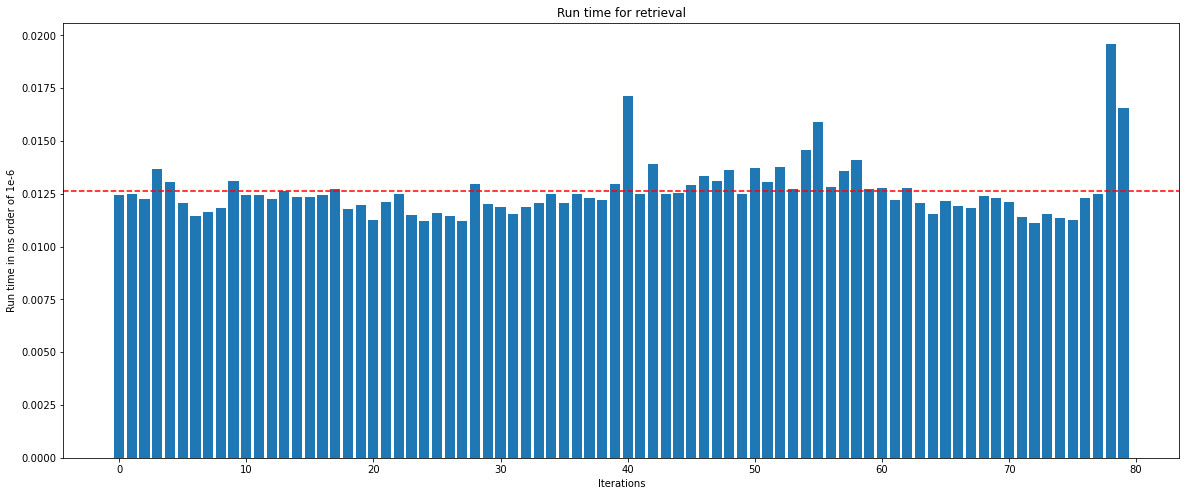

In [22]:
# Quick Sort Testing

# Testing the Heap Sort Algorithm

runs = 80
L1_run_times = []

for i in range(runs):
    L1_copy = [x for x in L1]
    

    start = timeit.default_timer()

    test_case = QuickSort(L1_copy)
    test_case.sort(test_case.sorted_items, 0, 99)

    stop = timeit.default_timer()

    L1_run_times.append(stop - start)

L2_run_times = []

for i in range(runs):
    L2_copy = [x for x in L2]
    

    start = timeit.default_timer()

    test_case = QuickSort(L2_copy)
    test_case.sort(test_case.sorted_items, 0, 999)

    stop = timeit.default_timer()

    L2_run_times.append(stop - start)

L3_run_times = []

for i in range(runs):
    L3_copy = [x for x in L3]
    

    start = timeit.default_timer()

    test_case = QuickSort(L3_copy)
    test_case.sort(test_case.sorted_items, 0, 7999)

    stop = timeit.default_timer()

    L3_run_times.append(stop - start)

draw_plot(L1_run_times)
draw_plot(L2_run_times)
draw_plot(L3_run_times)



In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

In [ ]:
# your implementation and experiments go here.

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [1]:
## your implementation and code goes here

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [ ]:
## your implementation and code goes here

**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

---
---